In [1]:
!pip install mplcursors

DEPRECATION: Loading egg at c:\users\velab\anaconda3\lib\site-packages\smplx-0.1.28-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplcursors
import warnings
warnings.filterwarnings('ignore')

### Data preprocessing

In [96]:
# 등차수열만 남기기
def filter_csv_rows(input_file, output_file, step=3):
    try:
        # CSV 파일 읽기
        df = pd.read_csv(input_file, header=None)

        # 특정 간격(step)의 행만 남기기
        filtered_df = df.iloc[::step]

        # 필터링된 데이터 저장
        filtered_df.to_csv(output_file, index=False)
        print(f"Filtered CSV saved to {output_file}")
    except Exception as e:
        print(f"Error: {e}")

In [103]:
input_csv = "../traj_vis/20241212/02_test/02_fail/03_mix/03_test_fail_mix.csv" # 입력 CSV 파일 경로
output_csv = "../traj_vis/20241212/02_test/02_fail/03_mix/03_test_fail_mix_after.csv" # 결과를 저장할 CSV 파일 경로
filter_csv_rows(input_csv, output_csv, step=3)

Filtered CSV saved to ../traj_vis/20241212/02_test/02_fail/03_mix/03_test_fail_mix_after.csv


In [38]:
def visualize_trajectory(file_path, trigger=1):
    
    # CSV file read
    data = pd.read_csv(file_path, header=None)

    if trigger == 1:
        data.columns = ['x', 'y', 'z', _, _, _, _, _, _]
    elif trigger == 2:
        data.columns = [_, _, _, 'x', 'y', 'z', _, _, _]
    elif trigger == 3:
        data.columns = [_, _, _, _, _, _, 'x', 'y', 'z']
    else:
        print("There is no trigger")

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    #ax.plot(data['x'], data['y'], data['z'], alpha=0.6)
    ax.plot(data['x'], data['z'], -data['y'], alpha=0.6)

    # color
    sc = ax.scatter(
        data['x'], data['z'], -data['y'],
        c=data['z'], cmap='viridis', s=5,
    )

    # Highlight the 0th index
    ax.scatter(
        data.loc[0, 'x'], data.loc[0, 'z'], -data.loc[0, 'y'],
        color='red', s=100, label='Index 0', edgecolor='black'
    )
    
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')

    cursor = mplcursors.cursor(sc, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        # Add frame index to the cursor annotation
        sel.annotation.set_text(f"Frame: {sel.index}")

    # 그래프 표시
    plt.show()

## Senario

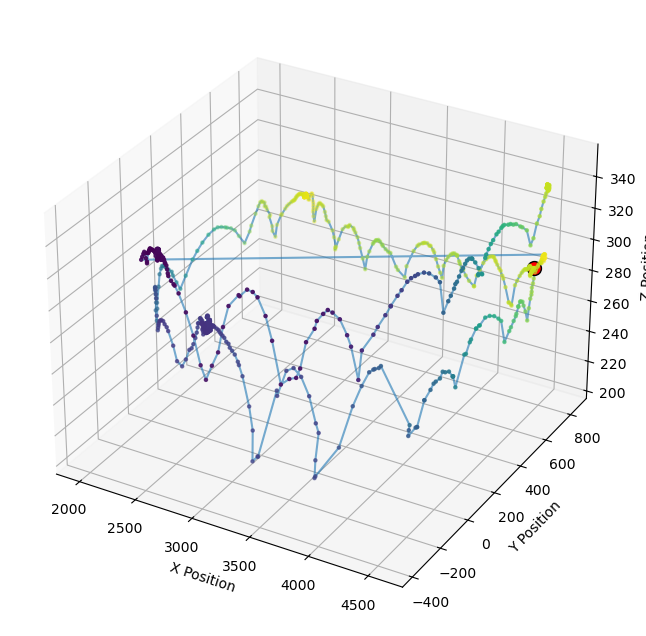

In [31]:
# Pelvis
visualize_trajectory('../traj_vis/20241212/01_senario/01_senario01_after.csv', 1)

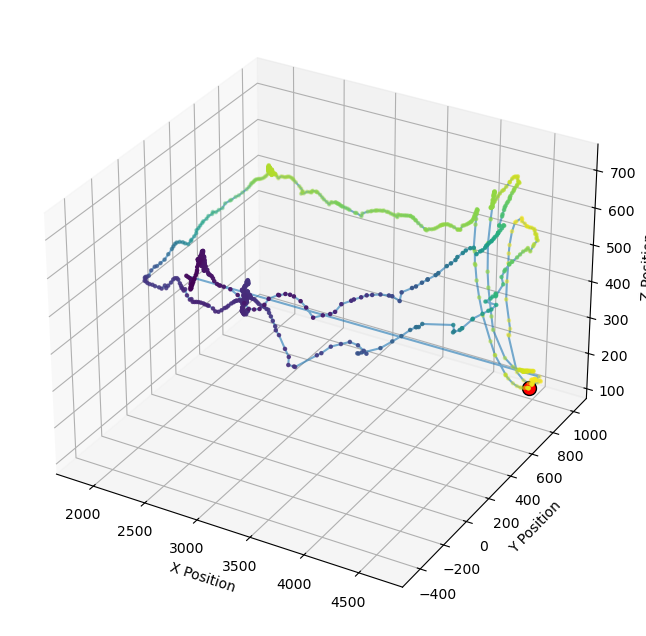

In [16]:
# rLarm
visualize_trajectory('../traj_vis/20241212/01_senario/01_senario01_after.csv', 2)

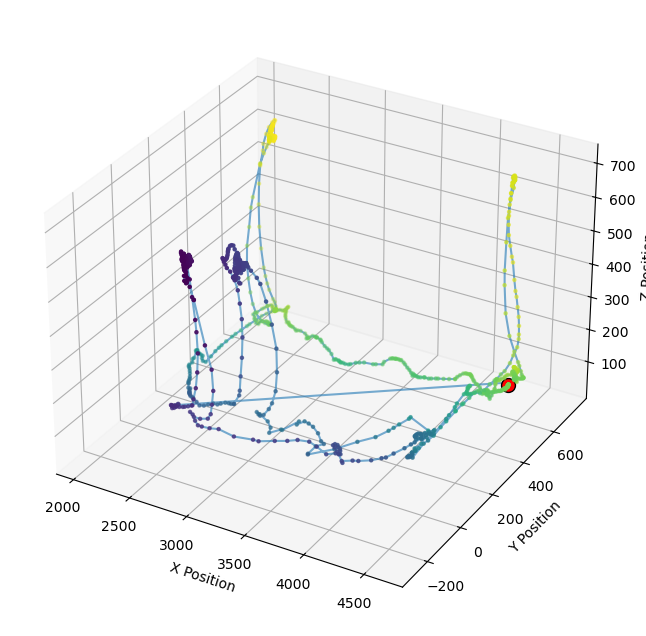

In [17]:
# lLarm
visualize_trajectory('../traj_vis/20241212/01_senario/01_senario01_after.csv', 3)

## Test

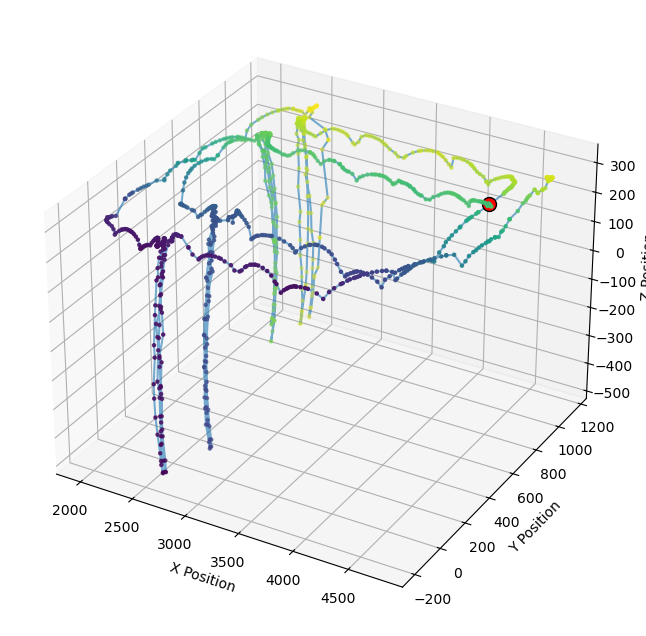

In [33]:
# Pelvis
visualize_trajectory('../traj_vis/20241212/02_test/01_success/02_test_success01_after.csv', 1)

## Scaling

In [43]:
def convert_dataframe_to_cm(df, origin):
    # Create a copy to avoid modifying the original DataFrame
    transformed_df = df.copy()

    transformed_df.columns = ['x', 'y', 'z']
    
    # Subtract origin and convert to cm
    transformed_df['x'] = (transformed_df['x'] - origin[0]) / 10  # Convert mm to cm
    transformed_df['y'] = (transformed_df['y'] - origin[1]) / 10
    transformed_df['z'] = (transformed_df['z'] - origin[2]) / 10

    return transformed_df

### 1번

In [50]:
origin = (822.586, 807.877, 41.1087)
df = pd.read_csv('../traj_vis/20241212/02_test/01_success/02_test_success01_pelvis.csv')
df = convert_dataframe_to_cm(df, origin)
df

,x,y,z
0,372.2024,-6.0245,25.43803
1,372.1664,-6.1736,25.47243
2,372.1384,-6.2300,25.49293
3,372.1394,-6.2185,25.49593
4,372.1184,-6.2052,25.49963
...,...,...,...
1206,390.1264,26.4473,24.66733
1207,389.9564,26.4223,24.66863
1208,389.6524,26.3353,24.66823
1209,389.4484,26.2793,24.66803


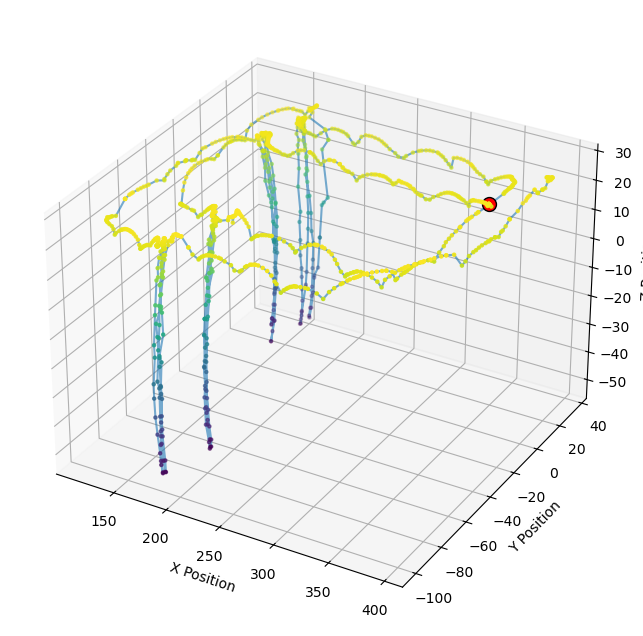

In [51]:
# CSV file read
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.plot(data['x'], data['y'], data['z'], alpha=0.6)
ax.plot(df['x'], df['y'], df['z'], alpha=0.6)

# color
sc = ax.scatter(
    df['x'], df['y'], df['z'],
    c=df['z'], cmap='viridis', s=5,
)

# Highlight the 0th index
ax.scatter(
    df.loc[0, 'x'], df.loc[0, 'y'], df.loc[0, 'z'],
    color='red', s=100, label='Index 0', edgecolor='black'
)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    # Add frame index to the cursor annotation
    sel.annotation.set_text(f"Frame: {sel.index}")

# 그래프 표시
plt.show()

### 2번

In [52]:
origin = (822.586, 807.877, 41.1087)
df = pd.read_csv('../traj_vis/20241212/02_test/01_success/02_test_success02_pelvis.csv')
df = convert_dataframe_to_cm(df, origin)
df

,x,y,z
0,366.4714,-6.1359,25.17973
1,366.4244,-6.2980,25.22363
2,366.3604,-6.5669,25.31093
3,366.2124,-6.8080,25.42183
4,366.1974,-6.9234,25.45793
...,...,...,...
1196,363.8804,18.1138,24.40233
1197,363.6144,18.1135,24.38233
1198,363.7014,18.1012,24.38173
1199,363.5044,18.0839,24.36713


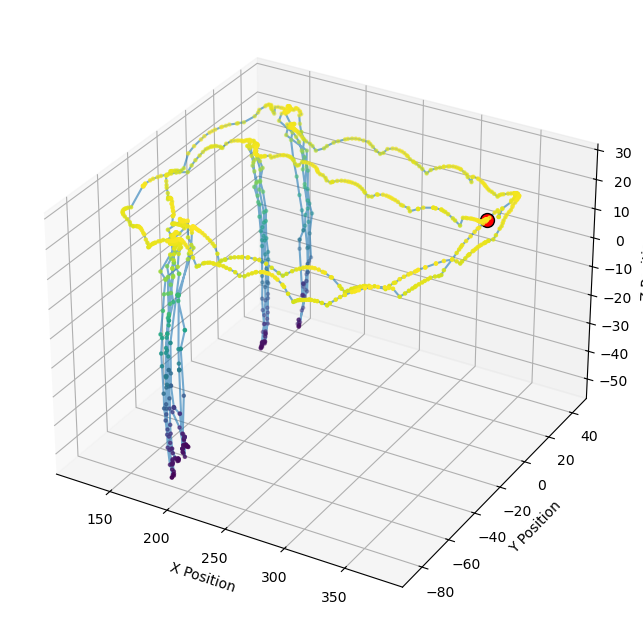

In [53]:
# CSV file read
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.plot(data['x'], data['y'], data['z'], alpha=0.6)
ax.plot(df['x'], df['y'], df['z'], alpha=0.6)

# color
sc = ax.scatter(
    df['x'], df['y'], df['z'],
    c=df['z'], cmap='viridis', s=5,
)

# Highlight the 0th index
ax.scatter(
    df.loc[0, 'x'], df.loc[0, 'y'], df.loc[0, 'z'],
    color='red', s=100, label='Index 0', edgecolor='black'
)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    # Add frame index to the cursor annotation
    sel.annotation.set_text(f"Frame: {sel.index}")

# 그래프 표시
plt.show()